# DATA 602  
**Group Project:** Cooking Dataset  
Classifying cuisine type based on ingredients used in the recipe.

In [20]:
import pandas
import collections # for Counter
import matplotlib.pyplot as plt

In [21]:
recipe_data = pandas.read_json('train.json', orient='records', typ='frame')

In [22]:
recipe_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


Probably the easiest way to do classification is to make each ingredient a separate binary attribute.

First let's make a list of all possible ingredients.

In [23]:
all_ingredients = []
for ingrds in recipe_data['ingredients']:
    all_ingredients += ingrds

In [24]:
len(all_ingredients)

428275

Now we can count occurences of each ingredient and find the most common *N* ingredients.

In [25]:
ingrd_cnt = collections.Counter()
# this list comprehension replaces spaces with underscores in each ingredient name
for ingrd in [item.replace(' ', '_') for item in all_ingredients]:
    ingrd_cnt[ingrd] += 1

In [26]:
len(ingrd_cnt)

6714

In [27]:
N_INGRDS = 10 # N most (or least) common ingredients.

There are 6,714 unique ingredients and the most common are:

In [28]:
most_common_ingrds = ingrd_cnt.most_common(N_INGRDS)
[print(ingrd) for ingrd in most_common_ingrds];

('salt', 18049)
('onions', 7972)
('olive_oil', 7972)
('water', 7457)
('garlic', 7380)
('sugar', 6434)
('garlic_cloves', 6237)
('butter', 4848)
('ground_black_pepper', 4785)
('all-purpose_flour', 4632)


In [29]:
# Code from https://stackoverflow.com/questions/4743035/obtaining-the-least-common-element-in-array
from operator import itemgetter
import heapq
def least_common(array, to_find=None):
    counter = collections.Counter(array)
    if to_find is None:
        return sorted(counter.items(), key=itemgetter(1), reverse=False)
    return heapq.nsmallest(to_find, counter.items(), key=itemgetter(1))

The N least common ingredients are:

In [30]:
least_common_ingrds = least_common([item.replace(' ', '_') for item in all_ingredients], N_INGRDS)
[print(ingrd) for ingrd in least_common_ingrds];

('white_almond_bark', 1)
('Johnsonville_Andouille_Dinner_Sausage', 1)
('lemon_olive_oil', 1)
('Taiwanese_bok_choy', 1)
('membrillo', 1)
('chestnut_flour', 1)
('cinnamon_graham_crackers', 1)
('chorizo_spanish', 1)
('instant_butterscotch_pudding_mix', 1)
('Guinness_Lager', 1)


In [31]:
# Create a list of most and least common ingredients.
most_and_least_common = most_common_ingrds + least_common_ingrds
[print(ingrd) for ingrd in most_and_least_common];

('salt', 18049)
('onions', 7972)
('olive_oil', 7972)
('water', 7457)
('garlic', 7380)
('sugar', 6434)
('garlic_cloves', 6237)
('butter', 4848)
('ground_black_pepper', 4785)
('all-purpose_flour', 4632)
('white_almond_bark', 1)
('Johnsonville_Andouille_Dinner_Sausage', 1)
('lemon_olive_oil', 1)
('Taiwanese_bok_choy', 1)
('membrillo', 1)
('chestnut_flour', 1)
('cinnamon_graham_crackers', 1)
('chorizo_spanish', 1)
('instant_butterscotch_pudding_mix', 1)
('Guinness_Lager', 1)


In [32]:
# save just the ingredient names as an ordered list
most_and_least_common = [ingrd for ingrd,cnt in most_and_least_common]
print(most_and_least_common)

['salt', 'onions', 'olive_oil', 'water', 'garlic', 'sugar', 'garlic_cloves', 'butter', 'ground_black_pepper', 'all-purpose_flour', 'white_almond_bark', 'Johnsonville_Andouille_Dinner_Sausage', 'lemon_olive_oil', 'Taiwanese_bok_choy', 'membrillo', 'chestnut_flour', 'cinnamon_graham_crackers', 'chorizo_spanish', 'instant_butterscotch_pudding_mix', 'Guinness_Lager']


In [33]:
try:
    for i in range(recipe_data.shape[0]): # the number of rows in the dataframe
        for ingrd in most_and_least_common:
#            recipe_data[ingrd][i] = int(ingrd in recipe_data['ingredients'][i])
            recipe_data[ingrd][i] = recipe_data.apply(lambda _: int(ingrd in recipe_data['ingredients'][i]), axis='columns')
except ValueError:
    print("Not sure what the problem is.")
except KeyError:
    print("Key error.")

Key error.


In [34]:
recipe_data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


Pandas didn't like something up there, but it seems to have done what I wanted so let's save it as a csv file.

In [16]:
recipe_data.to_csv('ingredients_training_mostandleast.csv')

OK, this file is fairly large (almost 40k rows and 23 columns), so we can always take a subset of the rows and use fewer common ingredient columns.

Let's look for outliers

In [17]:
num_ing = collections.Counter()
for i in range(recipe_data.shape[0]): # the number of rows in the dataframe
    # count the number of recipes that contain a given number of unique ingredients
    num_ing[len(recipe_data['ingredients'][i])] += 1 

In [18]:
ingredient_cnts = pandas.DataFrame(data=num_ing, index=range(len(num_ing)), columns=['ingredient_count'])

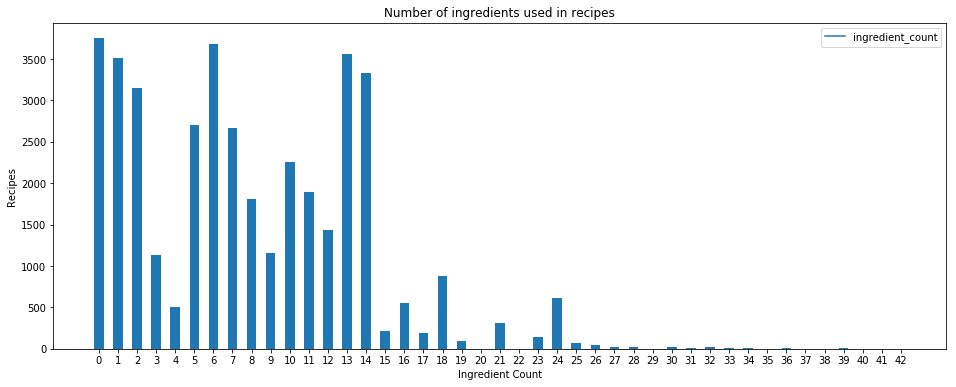

In [19]:
ax = ingredient_cnts.plot(figsize=(16, 6))
index = range(len(num_ing))
bar_width = 0.5

rects1 = ax.bar(x=index, height=list(num_ing.values()), width=bar_width)

#label the subplot
ax.set_xlabel("Ingredient Count")
ax.set_ylabel("Recipes")
ax.set_title("Number of ingredients used in recipes")
ax.set_xticks(index)
ax.set_xticklabels(range(max(num_ing.keys())))
ax.legend()
 
plt.show()